## TBI Dataset

### Import the data

In [1]:
import matplotlib.pyplot as plt
!pip install kmodes
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
import pandas as pd
import numpy as np

# to load the dataset from Google Drive, uncomment the below 3 lines and check the file path:
# see the assignment instructions on BruinLearn for help!
#
#from google.colab import drive
#drive.mount('/content/drive')
#filepath = '/content/drive/MyDrive/TBI.csv'
#
#############################################################################################

filepath = 'TBI.csv'


#we will use the pandas library to load the .csv file as a dataframe object:
tbi = pd.read_csv(filepath)

#pandas is a library to organize data into DataFrame objects, which have lots of useful methods
# it allows us to process our data more efficiently

pd.set_option('display.max_columns', None)
tbi.head(5) #print the top n rows of the dataframe

,PatientNum,Marshall,Rotterdam,CT_INTRACRANIAL_FINAL,SKULLFX,SKULLBASEFX,FACIALFX,EDH_FINAL,SDH_FINAL,SAH_FINAL,CONTUSION_FINAL,MIDLINESHIFT_FINAL,CISTERNCOMP_FINAL,MR_result,GOSE_OverallScore3M,GOSE_OverallScore6M,PTSD_6mo,WAIS_PSI_Composite_6mo,CVLTShortDelayCuedRecallStandardScore_6mo,CVLTLongDelayCuedRecallStandardScore_6mo,rs4680,rs6277,rs3219119,rs11604671,rs4938016,rs1800497
0,BR-1001,1,2,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BR-1003,1,2,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2.0
2,BR-1004,1,2,0,0,0,1,0,0,0,0,0,0,NaN,8.0,8.0,0.0,89.0,0.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,BR-1006,1,2,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2.0
4,BR-1007,2,2,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,3.0


In [2]:
X1=tbi['Marshall']
X2=tbi['Rotterdam']
X=tbi[['Marshall','Rotterdam','CT_INTRACRANIAL_FINAL','SKULLBASEFX','SKULLFX','FACIALFX','EDH_FINAL','SDH_FINAL','SAH_FINAL','CONTUSION_FINAL','MIDLINESHIFT_FINAL','CISTERNCOMP_FINAL']]
Xnew=tbi[['Marshall','Rotterdam']]
X.head(15)

,Marshall,Rotterdam,CT_INTRACRANIAL_FINAL,SKULLBASEFX,SKULLFX,FACIALFX,EDH_FINAL,SDH_FINAL,SAH_FINAL,CONTUSION_FINAL,MIDLINESHIFT_FINAL,CISTERNCOMP_FINAL
0,1,2,0,0,0,0,0,0,0,0,0,0
1,1,2,0,0,0,0,0,0,0,0,0,0
2,1,2,0,0,0,1,0,0,0,0,0,0
3,1,2,0,0,0,0,0,0,0,0,0,0
4,2,2,0,0,0,0,0,0,0,0,0,0
5,1,2,0,0,0,1,0,0,0,0,0,0
6,4,3,1,1,1,0,0,1,1,1,1,0
7,1,2,0,0,0,0,0,0,0,0,0,0
8,1,2,0,0,0,0,0,0,0,0,0,0
9,1,2,0,0,0,0,0,0,0,0,0,0


In [211]:
data_cat=X;
lable=['Marshall','Rotterdam','CT_INTRACRANIAL_FINAL','SKULLBASEFX','SKULLFX','FACIALFX','EDH_FINAL','SDH_FINAL','SAH_FINAL','CONTUSION_FINAL','MIDLINESHIFT_FINAL','CISTERNCOMP_FINAL']
costs = np.zeros((len(lable), 11))
j=0
for i in lable:
    X_exclude=data_cat.drop(i,axis=1)
    
    # test Kmodes on a purely categorical dataset:
    km = KModes(n_clusters=3, init='Huang', n_init=5, verbose=1)
    km.fit(X_exclude)
    clusters = km.predict(X_exclude)

    # print the cluster centroids as coordinates in the data:
    for idx, centroid in enumerate(km.cluster_centroids_):
        print("centroid", idx + 1, "coords.:", centroid)

    # Elbow plot to determine the optimal number of clusters
    #costs = 
    
    for num_clusters in range(1, 11):
        km = KModes(n_clusters=num_clusters, init='Huang', n_init=5, verbose=0)
        km.fit(X_exclude)
        #costs.append(km.cost_)
        costs[j][num_clusters]=km.cost_
    
    j=j+1
        
    Plotting the elbow plot
    plt.plot(range(1, 11), costs, marker='o')
    plt.title('Elbow Plot for Optimal k')
    plt.xlabel('Number of Clusters (k) without {i}')
    plt.ylabel('Cost')

    plt.show()

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 140, cost: 692.0
Run 1, iteration: 2/100, moves: 13, cost: 692.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 83, cost: 692.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 18, cost: 702.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 147, cost: 727.0
Run 4, iteration: 2/100, moves: 21, cost: 727.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 16, cost: 739.0
Best run was number 1
centroid 1 coords.: [3 1 0 1 0 0 1 1 1 0 0]
centroid 2 coords.: [2 1 0 0 0 0 1 1 0 0 0]
centroid 3 coords.: [2 0 0 0 0 0 0 0 0 0 0]
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, mov

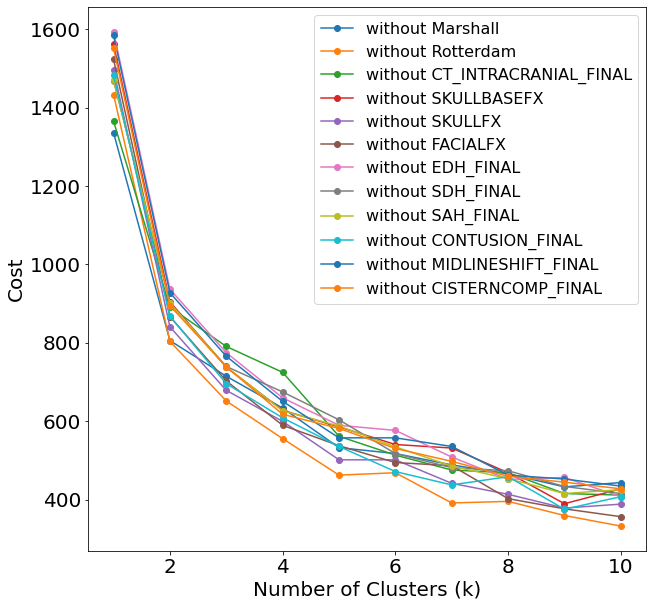

In [205]:
# Plotting the elbow plot
plt.figure(figsize=(10, 10))
cost_k3o1=[]
for k in range(0, 12):
    cost_k3o1.append(costs[k,3]/costs[k,1]) #smaller values means more important feature
    plt.plot(range(1, 11), costs[k,1:11], marker='o', label=f'without {lable[k]}')
    
#plt.title('Elbow Plot for Optimal k', fontsize=20)
plt.xlabel('Number of Clusters (k)', fontsize=20)
plt.ylabel('Cost', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(fontsize=16)
save_path = 'C:/Users/parniyan/OneDrive - UCLA IT Services/Courses/2023-24/2023Fall/C204_MachineLearning/Project/Report/elb2.png' 
plt.savefig(save_path, bbox_inches='tight')
plt.show()

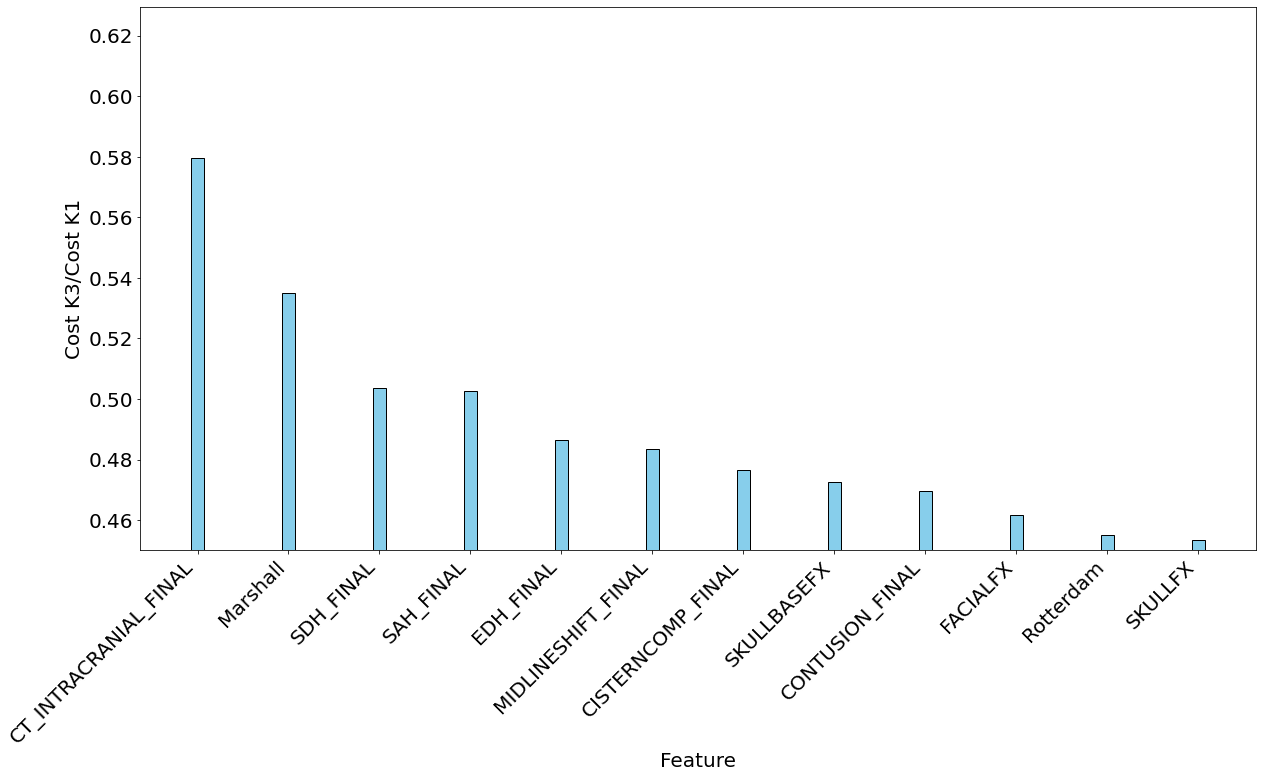

In [201]:
#Plot
sorted_indices = np.argsort(cost_k3o1)[::-1]

# Use sorted indices to reorder the data
sorted_lable = [lable[i] for i in sorted_indices]
sorted_cost_k3o1 = [cost_k3o1[i] for i in sorted_indices]

# Plot the sorted data
plt.figure(figsize=(20, 10))
plt.bar(sorted_lable, sorted_cost_k3o1, color='skyblue', edgecolor='black',width=0.15)
plt.xlabel('Feature', fontsize=20)
plt.ylabel('Cost K3/Cost K1', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0.45, max(sorted_cost_k3o1) + 0.05)

save_path = 'C:/Users/parniyan/OneDrive - UCLA IT Services/Courses/2023-24/2023Fall/C204_MachineLearning/Project/Report/cost1.png' 
plt.savefig(save_path, bbox_inches='tight')
plt.show()

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 90, cost: 846.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 126, cost: 914.0
Run 2, iteration: 2/100, moves: 47, cost: 846.0
Run 2, iteration: 3/100, moves: 47, cost: 846.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 77, cost: 846.0
Run 3, iteration: 2/100, moves: 30, cost: 846.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 106, cost: 943.0
Run 4, iteration: 2/100, moves: 78, cost: 864.0
Run 4, iteration: 3/100, moves: 4, cost: 864.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 88, cost: 880.0
Run 5, iteration: 2/100, moves: 15, cost: 880.0
Best run was number 1
centroid 1 coords.: [2 3 1 0 1 0 0 1 1 1 0 0]
cen

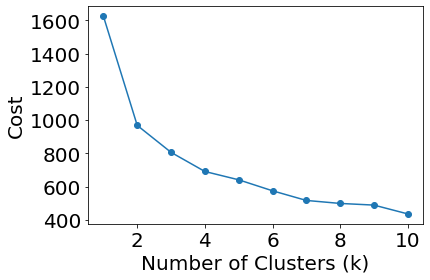

In [3]:
import matplotlib.pyplot as plt
from kmodes.kmodes import KModes
data_cat=X;
# test Kmodes on a purely categorical dataset:
kmf = KModes(n_clusters=3, init='Huang', n_init=5, verbose=1)
kmf.fit(data_cat)
clusters = kmf.predict(data_cat)

# print the cluster centroids as coordinates in the data:
for idx, centroid in enumerate(kmf.cluster_centroids_):
    print("centroid", idx + 1, "coords.:", centroid)

# Elbow plot to determine the optimal number of clusters
costsf = []
for num_clusters in range(1, 11):
    kmf = KModes(n_clusters=num_clusters, init='Huang', n_init=5, verbose=0)
    kmf.fit(data_cat)
    costsf.append(kmf.cost_)

# Plotting the elbow plot
plt.plot(range(1, 11), costsf, marker='o')
plt.xlabel('Number of Clusters (k)', fontsize=20)
plt.ylabel('Cost', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
save_path = 'C:/Users/parniyan/OneDrive - UCLA IT Services/Courses/2023-24/2023Fall/C204_MachineLearning/Project/Report/elb1.png' 
plt.savefig(save_path, bbox_inches='tight')
plt.show()


In [6]:
#Let's calculate average PTSD for each cluster
data_PTSD=tbi[['Marshall','Rotterdam','CT_INTRACRANIAL_FINAL','SKULLBASEFX','SKULLFX','FACIALFX','EDH_FINAL','SDH_FINAL','SAH_FINAL','CONTUSION_FINAL','MIDLINESHIFT_FINAL','CISTERNCOMP_FINAL','GOSE_OverallScore3M','GOSE_OverallScore6M','PTSD_6mo','CVLTShortDelayCuedRecallStandardScore_6mo','CVLTLongDelayCuedRecallStandardScore_6mo','WAIS_PSI_Composite_6mo']]
#First clean the data set
clean_data=data_PTSD.dropna()
#predict=kmf.predict(clean_data)

In [31]:
# test Kmodes on a purely categorical dataset:
kmf = KModes(n_clusters=3, init='Huang', n_init=5, verbose=1)
kmf.fit(data_cat)
clusters = kmf.predict(data_cat)
predict=kmf.predict(data_cat)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 118, cost: 818.0
Run 1, iteration: 2/100, moves: 5, cost: 818.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 123, cost: 812.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 204, cost: 831.0
Run 3, iteration: 2/100, moves: 87, cost: 801.0
Run 3, iteration: 3/100, moves: 2, cost: 801.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 98, cost: 804.0
Run 4, iteration: 2/100, moves: 9, cost: 804.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 110, cost: 806.0
Run 5, iteration: 2/100, moves: 33, cost: 806.0
Best run was number 3


In [32]:
col_list = ['Marshall','Rotterdam','CT_INTRACRANIAL_FINAL','SKULLBASEFX','SKULLFX','FACIALFX','EDH_FINAL','SDH_FINAL','SAH_FINAL','CONTUSION_FINAL','MIDLINESHIFT_FINAL','CISTERNCOMP_FINAL']
predict=kmf.predict(clean_data[col_list])

In [33]:
clean_data['K'] = predict

<ipython-input-33-8caf0943574b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['K'] = predict


0.0    60
1.0     9
Name: PTSD_6mo, dtype: int64
0.0    98
1.0    41
Name: PTSD_6mo, dtype: int64
0.0    41
1.0    16
Name: PTSD_6mo, dtype: int64
Series([], Name: PTSD_6mo, dtype: int64)
Series([], Name: PTSD_6mo, dtype: int64)


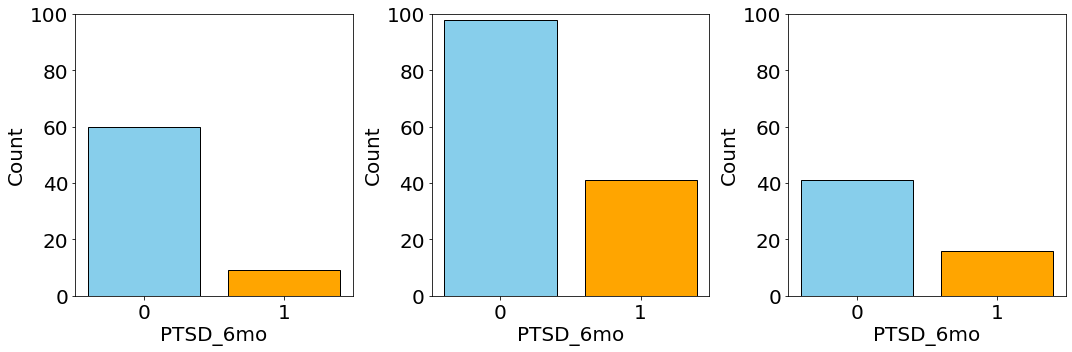

In [66]:
#For PTSD
PTSD_K0 = clean_data[clean_data['K']==0]['PTSD_6mo'].value_counts()
print(PTSD_K0)
PTSD_K1 = clean_data[clean_data['K']==1]['PTSD_6mo'].value_counts()
print(PTSD_K1)
PTSD_K2 = clean_data[clean_data['K']==2]['PTSD_6mo'].value_counts()
print(PTSD_K2)
PTSD_K3 = clean_data[clean_data['K']==3]['PTSD_6mo'].value_counts()
print(PTSD_K3)
PTSD_K4 = clean_data[clean_data['K']==4]['PTSD_6mo'].value_counts()
print(PTSD_K4)
#print(PTSD_K0,PTSD_K1,PTSD_K2)
data0=clean_data[clean_data['K']==0]['PTSD_6mo']
data1=clean_data[clean_data['K']==1]['PTSD_6mo']
data2=clean_data[clean_data['K']==2]['PTSD_6mo']
#databox= [data0, data1, data2]
#plt.boxplot(databox, labels=['Dataset 1', 'Dataset 2', 'Dataset 3'])
#plt.xlabel('Datasets')
#plt.ylabel('Values')
#plt.title('Box Plot for Three Datasets')
#plt.show()
data=[PTSD_K0,PTSD_K1,PTSD_K2]
num_groups = len(data)

max_count = max(group.max() for group in data)

plt.figure(figsize=(15, 5))
for i, group in enumerate(data, start=1):
    plt.subplot(1, num_groups, i)
    plt.bar(group.index, group.values, color=['skyblue', 'orange'],edgecolor='black')
    #plt.title(f'Group {i} Histogram')
    plt.xlabel('PTSD_6mo',fontsize=20)
    plt.ylabel('Count',fontsize=20)
    plt.ylim(0, max_count+2)
    plt.xticks([0, 1],fontsize=20)
    plt.yticks(fontsize=20)
plt.tight_layout()
save_path = 'C:/Users/parniyan/OneDrive - UCLA IT Services/Courses/2023-24/2023Fall/C204_MachineLearning/Project/Report/PTSD.png' 
plt.savefig(save_path, bbox_inches='tight')
plt.show()

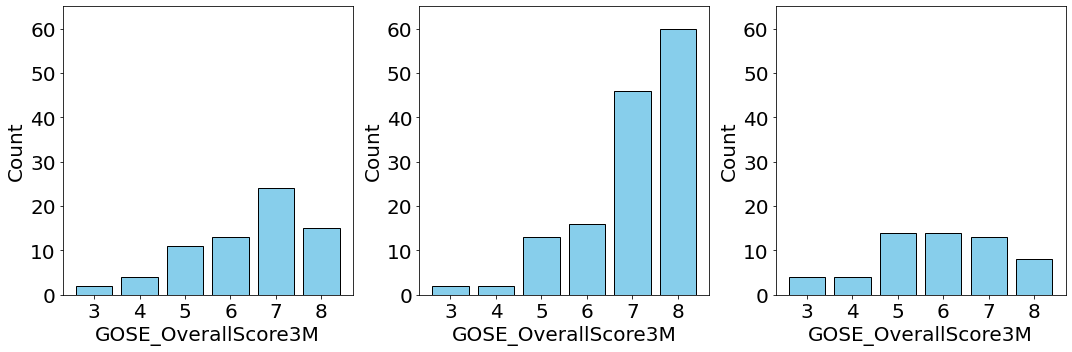

In [65]:
#For GOSE_OverallScore3M
PTSD_K0 = clean_data[clean_data['K']==0]['GOSE_OverallScore3M'].value_counts()
#print(PTSD_K0)
PTSD_K1 = clean_data[clean_data['K']==1]['GOSE_OverallScore3M'].value_counts()
#print(PTSD_K1)
PTSD_K2 = clean_data[clean_data['K']==2]['GOSE_OverallScore3M'].value_counts()
#print(PTSD_K2)
data=[PTSD_K0,PTSD_K1,PTSD_K2]
num_groups = len(data)

max_count = max(group.max() for group in data)

plt.figure(figsize=(15, 5))
for i, group in enumerate(data, start=1):
    plt.subplot(1, num_groups, i)
    plt.bar(group.index, group.values, color='skyblue',edgecolor='black')
    #plt.title(f'Group {i} Histogram')
    plt.xlabel('GOSE_OverallScore3M',fontsize=20)
    plt.ylabel('Count',fontsize=20)
    plt.ylim(0, max_count + 5)
    plt.xticks(group.index,fontsize=20)
    plt.yticks(fontsize=20)
plt.tight_layout()
save_path = 'C:/Users/parniyan/OneDrive - UCLA IT Services/Courses/2023-24/2023Fall/C204_MachineLearning/Project/Report/GOSE3.png' 
plt.savefig(save_path, bbox_inches='tight')
plt.show()

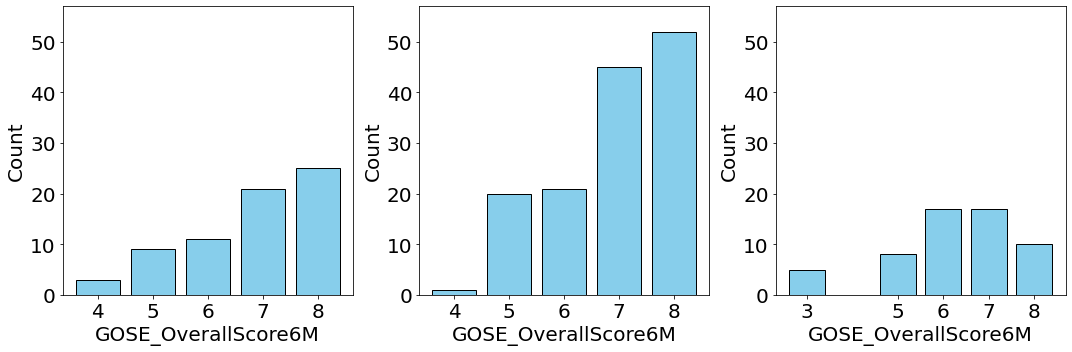

In [64]:
#For GOSE_OverallScore6M
PTSD_K0 = clean_data[clean_data['K']==0]['GOSE_OverallScore6M'].value_counts()
#print(PTSD_K0)
PTSD_K1 = clean_data[clean_data['K']==1]['GOSE_OverallScore6M'].value_counts()
#print(PTSD_K1)
PTSD_K2 = clean_data[clean_data['K']==2]['GOSE_OverallScore6M'].value_counts()
#print(PTSD_K2)
data=[PTSD_K0,PTSD_K1,PTSD_K2]
num_groups = len(data)
max_count = max(group.max() for group in data)
plt.figure(figsize=(15, 5))
for i, group in enumerate(data, start=1):
    plt.subplot(1, num_groups, i)
    plt.bar(group.index, group.values, color='skyblue',edgecolor='black')
    #plt.title(f'Group {i} Histogram')
    plt.xlabel('GOSE_OverallScore6M',fontsize=20)
    plt.ylabel('Count',fontsize=20)
    plt.ylim(0, max_count + 5)
    plt.xticks(group.index,fontsize=20)
    plt.yticks(fontsize=20)
plt.tight_layout()
save_path = 'C:/Users/parniyan/OneDrive - UCLA IT Services/Courses/2023-24/2023Fall/C204_MachineLearning/Project/Report/GOSE6.png' 
plt.savefig(save_path, bbox_inches='tight')
plt.show()

<Figure size 1080x360 with 0 Axes>

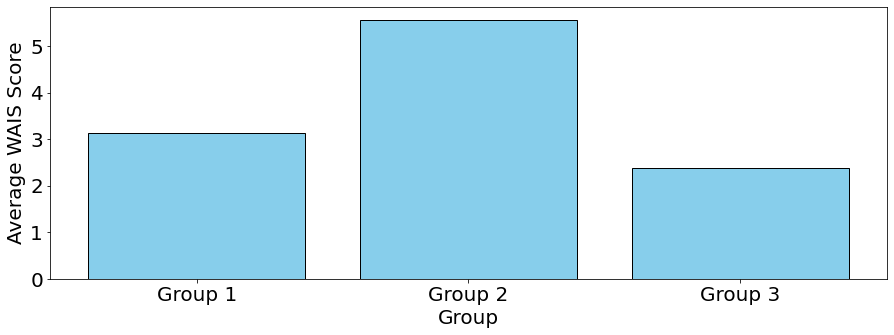

In [67]:
#For CVLTShortDelayCuedRecallStandardScore_6mo 	
PTSD_K0 = clean_data[clean_data['K']==0]['WAIS_PSI_Composite_6mo'].value_counts()
#print(PTSD_K0)
PTSD_K1 = clean_data[clean_data['K']==1]['WAIS_PSI_Composite_6mo'].value_counts()
#print(PTSD_K1)
PTSD_K2 = clean_data[clean_data['K']==2]['WAIS_PSI_Composite_6mo'].value_counts()
#print(PTSD_K2)
data=[PTSD_K0,PTSD_K1,PTSD_K2]
averages = [group.mean() for group in data]
num_groups = len(data)
max_count = max(group.max() for group in data)
plt.figure(figsize=(15, 5))
plt.figure(figsize=(15, 5))
plt.bar(range(1, num_groups + 1), averages, color='skyblue',edgecolor='black')
#plt.title('Average WAIS_PSI_Composite_6mo for Each Group')
plt.xlabel('Group',fontsize=20)
plt.ylabel('Average WAIS Score',fontsize=20)
plt.xticks(range(1, num_groups + 1), labels=[f'Group {i}' for i in range(1, num_groups + 1)],fontsize=20)
plt.yticks(fontsize=20)
save_path = 'C:/Users/parniyan/OneDrive - UCLA IT Services/Courses/2023-24/2023Fall/C204_MachineLearning/Project/Report/WAIS.png' 
plt.savefig(save_path, bbox_inches='tight')
plt.show()


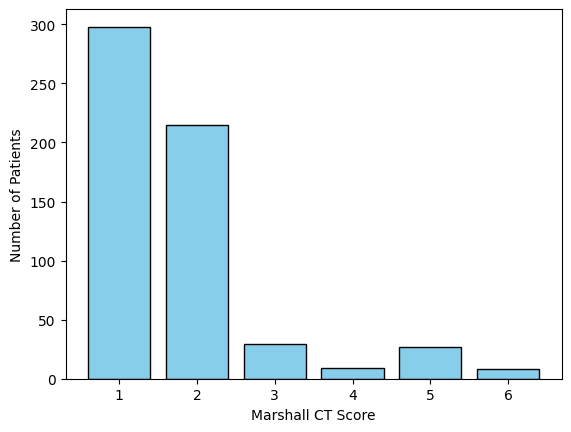

In [ ]:
# Histogram
tbi_sub=tbi['Marshall']
bin_edges = np.arange(1, 8) - 0.5
plt.hist(tbi_sub,bins=bin_edges, rwidth=0.8, color='skyblue', edgecolor='black',align='mid')
plt.xlabel('Marshall CT Score')
plt.ylabel('Number of Patients')

plt.show()